<a href="https://colab.research.google.com/github/Firizki17/Pengolahan-Citra-Digital/blob/main/Denoising_MuhFirizki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import cv2
import numpy as np
import requests
from skimage import img_as_ubyte
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
# URL gambar
url = "https://cdn0-production-images-kly.akamaized.net/fo7nZ-z7YDc6cniqz6KAm84bCdY=/800x1066/smart/filters:quality(75):strip_icc():format(webp)/kly-media-production/medias/3388845/original/075416400_1614487090-Luna_Maya_0.jpg"


In [25]:
# Unduh gambar dari URL
response = requests.get(url)
if response.status_code == 200:
    img = Image.open(BytesIO(response.content)).convert('L')  # Convert to grayscale
    img = np.array(img, dtype=np.float32) / 255.0  # Normalize pixel values
else:
    raise Exception("Gagal mengunduh gambar dari URL")

In [26]:
# Generate Salt and Pepper Noise
def add_salt_pepper_noise(image, pepper_ratio=0.1, salt_ratio=0.95):
    noisy_image = np.copy(image)
    x, y = noisy_image.shape
    for i in range(x):
        for j in range(y):
            rdn = np.random.random()
            if rdn < pepper_ratio:
                noisy_image[i, j] = 0
            elif rdn > salt_ratio:
                noisy_image[i, j] = 1
    return noisy_image

img_noise = add_salt_pepper_noise(img)

In [27]:
# Apply filters to denoise
# Mean filter (average)
kernel_size = (5, 5)
denoise_mean = cv2.blur(img_noise, kernel_size)

In [28]:
# Apply filters to denoise
# Mean filter (average)
kernel_size = (5, 5)
denoise_mean = cv2.blur(img_noise, kernel_size)

In [38]:
# Median filter
img_noise_median = img_as_ubyte(np.clip(img_noise, 0, 1))  # Convert to uint8
denoise_median = cv2.medianBlur(img_noise_median, 11)

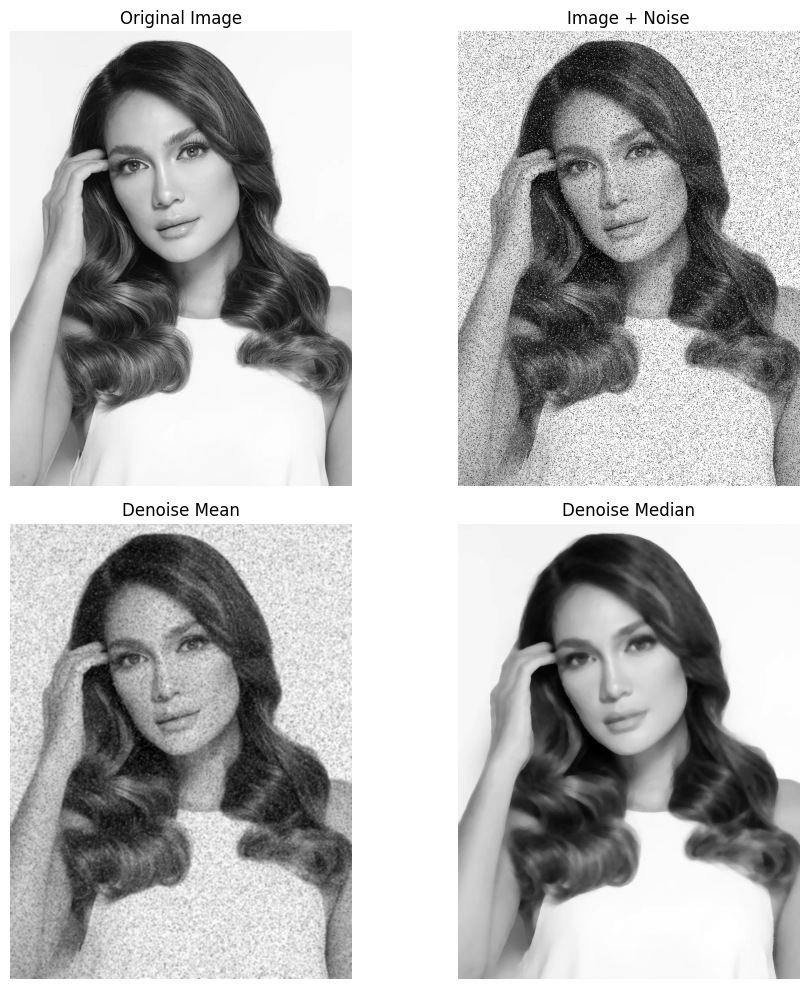

True

In [39]:
# Preview the images using plt
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].imshow(img, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(img_noise, cmap='gray')
axs[0, 1].set_title('Image + Noise')
axs[0, 1].axis('off')

axs[1, 0].imshow(denoise_mean, cmap='gray')
axs[1, 0].set_title('Denoise Mean')
axs[1, 0].axis('off')

axs[1, 1].imshow(denoise_median, cmap='gray')
axs[1, 1].set_title('Denoise Median')
axs[1, 1].axis('off')
plt.tight_layout()
plt.show()

# (Optional) Save the result
cv2.imwrite('Denoise_mean.jpg', img_as_ubyte(denoise_mean))
cv2.imwrite('Denoise_median.jpg', denoise_median)